# Data information
Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine omics data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.

# Problem Statement:
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.

# Importing / Installing packages

In [1]:
import os #provides functions for interacting with the operating system
os.chdir('C:\\Users\\LC\\Desktop\\vaccine_1')
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt


In [2]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


# Loading dataset

In [3]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Missing values in each column

In [5]:
df.isnull().sum()

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
Percent

has_health_insur             45.957989
income_level                 16.561201
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
housing_status                7.645936
employment                    5.477965
marital_status                5.272026
qualification                 5.268282
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
sick_from_seas_vacc           2.010709
is_seas_risky                 1.924589
is_seas_vacc_effective        1.729884
sick_from_h1n1_vacc           1.479013
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
no_of_children                0.932340
no_of_adults                  0.932340
contact_avoidance             0.778822
avoid_touch_face              0.479275
h1n1_awareness                0.434343
h1n1_worry                    0.344479
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
antiviral_medication     

# Dropping non required columns

In [6]:

df.drop(['has_health_insur'],axis=1,inplace=True)
df.drop(['unique_id'],axis=1,inplace=True)

# Preprocessing the dataset

## Handling missing value of each column

In [9]:
df['income_level']=df['income_level'].fillna(df['income_level'].mode()[0])
df=df.dropna(subset=['dr_recc_h1n1_vacc'])# handling nan value by dropping those rows
df=df.dropna(subset=['housing_status'])
df['h1n1_worry'].fillna(df['h1n1_worry'].median(), inplace=True)
df['h1n1_awareness'].fillna(df['h1n1_awareness'].median(), inplace=True)
df['antiviral_medication'].fillna(df['antiviral_medication'].median(), inplace=True)
df['contact_avoidance'].fillna(df['contact_avoidance'].median(), inplace=True)
df['bought_face_mask'].fillna(df['bought_face_mask'].median(), inplace=True)
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].median(), inplace=True)
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].median(), inplace=True)
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].median(), inplace=True)
df['avoid_touch_face'].fillna(df['avoid_touch_face'].median(), inplace=True)
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_seasonal_vacc'].median(), inplace=True)
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].median(), inplace=True)
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].median(), inplace=True)
df['is_health_worker'].fillna(df['is_health_worker'].median(), inplace=True)
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].median(), inplace=True)
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].median(), inplace=True)
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].median(), inplace=True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].median(), inplace=True)
df['is_seas_risky'].fillna(df['is_seas_risky'].median(), inplace=True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].median(), inplace=True)
df['qualification']=df['qualification'].fillna(df['qualification'].mode()[0])
df['race']=df['race'].fillna(df['race'].mode()[0])
df['marital_status']=df['marital_status'].fillna(df['marital_status'].mode()[0])
df['employment']=df['employment'].fillna(df['employment'].mode()[0])
df.drop(['employment'],axis=1,inplace=True)#PURE CATEGORICAL IGNORE
df['no_of_adults'].fillna(df['no_of_adults'].median(), inplace=True)
df['no_of_children'].fillna(df['no_of_children'].median(), inplace=True)

KeyError: 'employment'

# Mapping some ordinal and nominal type to numeric

In [14]:
#25 variable:income_level 
# Rename all d Grp in ordinal order
df['income_level']=df.get('income_level').replace('Below Poverty','0')
df['income_level']=df.get('income_level').replace('> $75,000','1')
df['income_level']=df.get('income_level').replace('<= $75,000, Above Poverty','2')

## Variable 22, age_bracket
# Rename all d Grp in ordinal order
df['age_bracket']=df.get('age_bracket').replace('18 - 34 Years','0')
df['age_bracket']=df.get('age_bracket').replace('35 - 44 Years','1')
df['age_bracket']=df.get('age_bracket').replace('45 - 54 Years','2')
df['age_bracket']=df.get('age_bracket').replace('55 - 64 Years','3')
df['age_bracket']=df.get('age_bracket').replace('65+ Years','4')

## Variable 23, qualification
# Rename all d Grp in ordinal order
df['qualification']=df.get('qualification').replace('< 12 Years','0.0')
df['qualification']=df.get('qualification').replace('12 Years','1.0')
df['qualification']=df.get('qualification').replace('Some College','2.0')
df['qualification']=df.get('qualification').replace('College Graduate','3.0')

# Variable 24 race in nominal type
# cn try clubbing 2 grps, 1 White & ( Black + Hispanic + Other or Multiple)
df['race']=df.get('race').replace('Hispanic','Black')
df['race']=df.get('race').replace('Other or Multiple','Black')

# Variable 30, census_msa category
# cn try clubbing 2 grps, 1 MSA & 2 Non-MSA
df['census_msa']=df.get('census_msa').replace('MSA, Not Principle  City','MSA')
df['census_msa']=df.get('census_msa').replace('MSA, Principle City','MSA')


# Exploratory Data Analysis

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

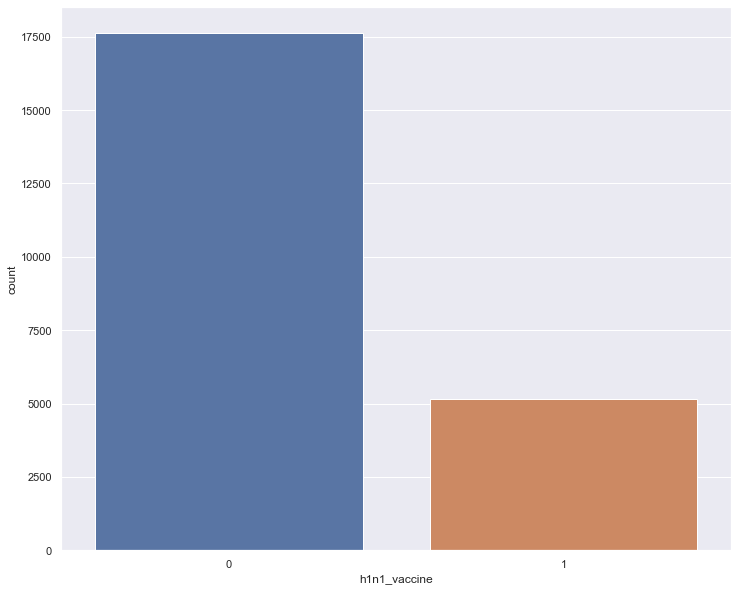

In [15]:
sns.countplot(x ='h1n1_vaccine', data = df) 

<AxesSubplot:xlabel='income_level', ylabel='count'>

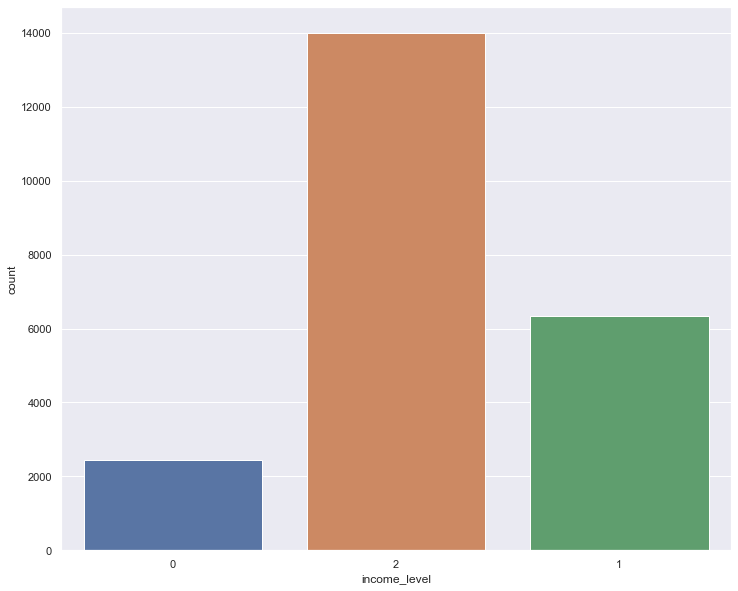

In [16]:
sns.countplot(x ='income_level', data = df) 

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

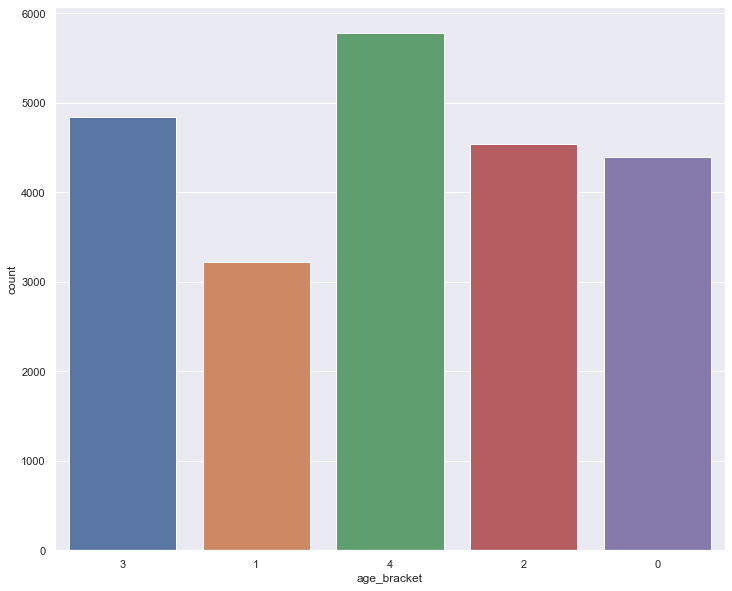

In [17]:

sns.countplot(x ='age_bracket', data = df) 

<AxesSubplot:xlabel='race', ylabel='count'>

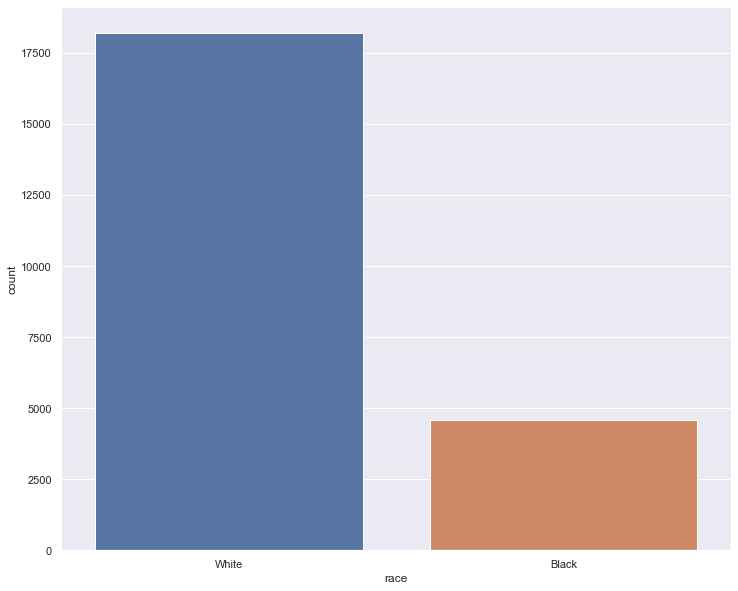

In [18]:
sns.countplot(x ='race', data = df) 

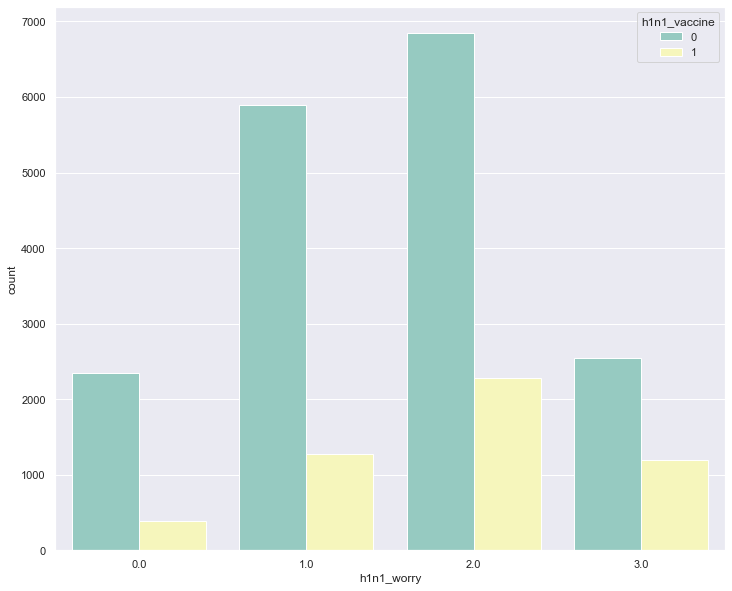

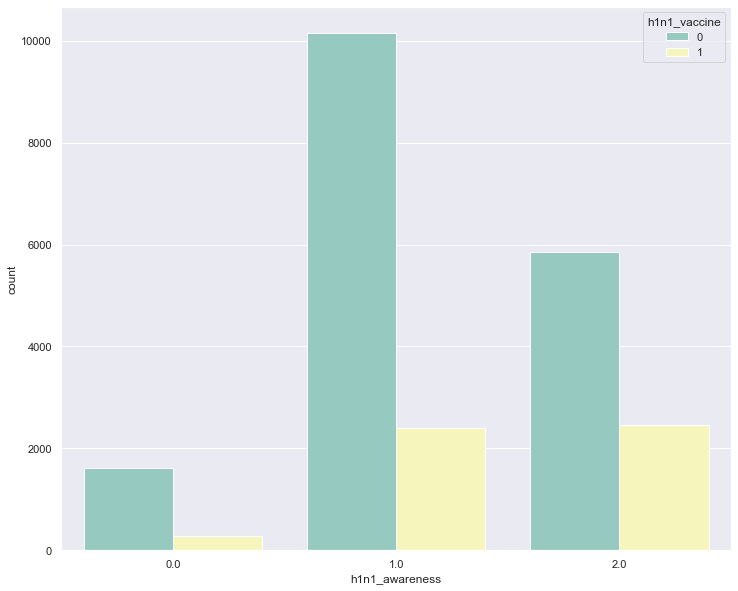

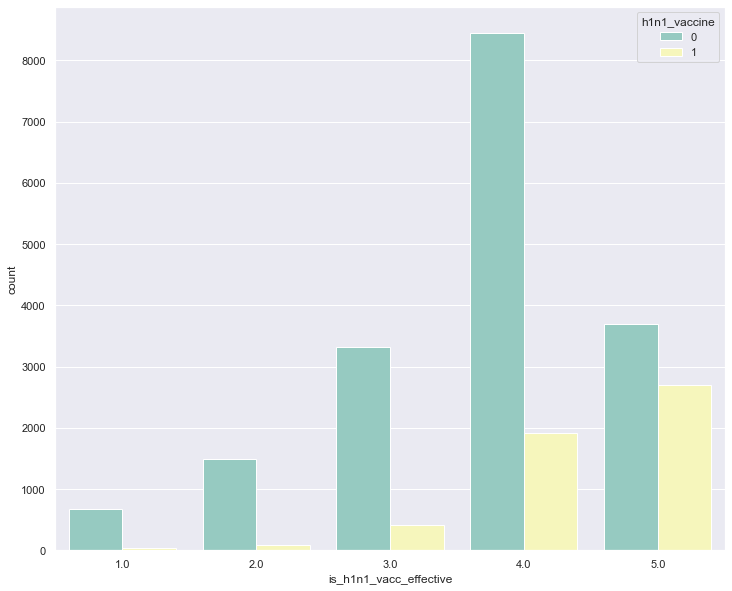

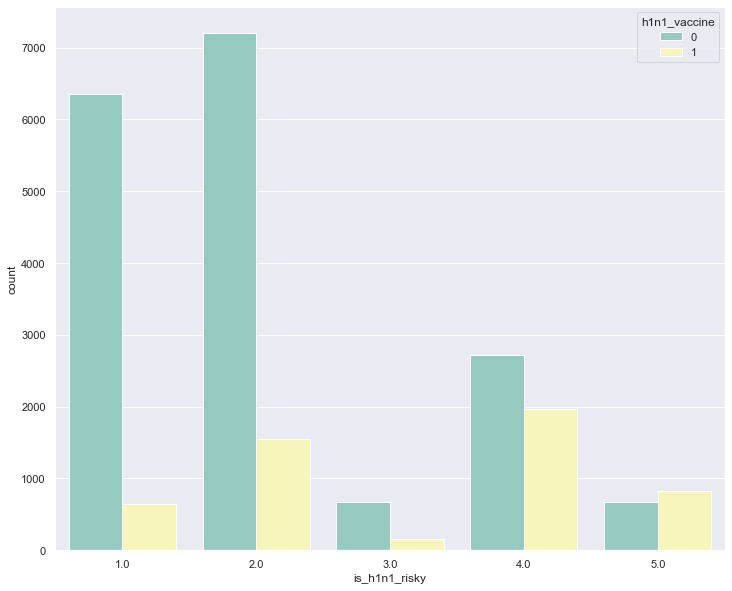

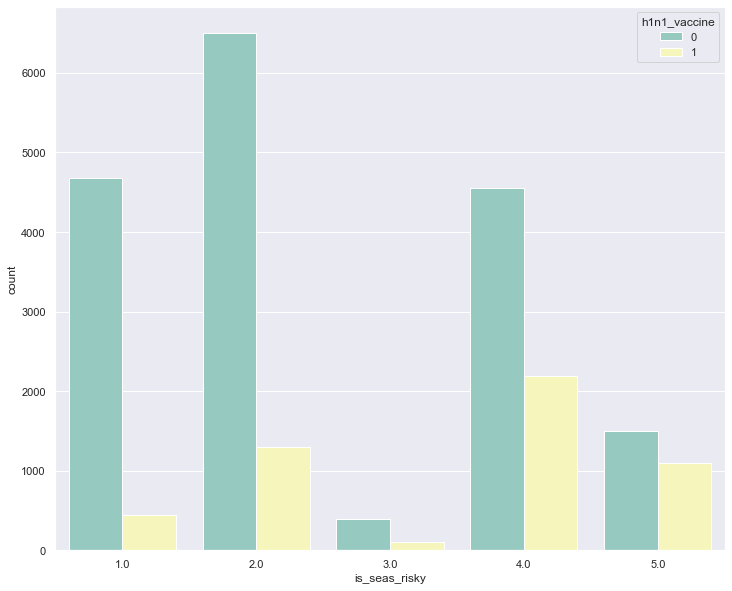

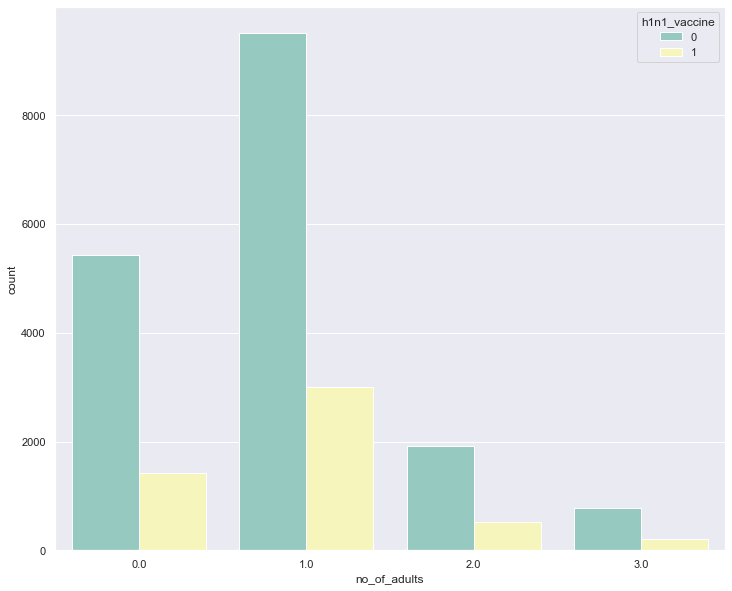

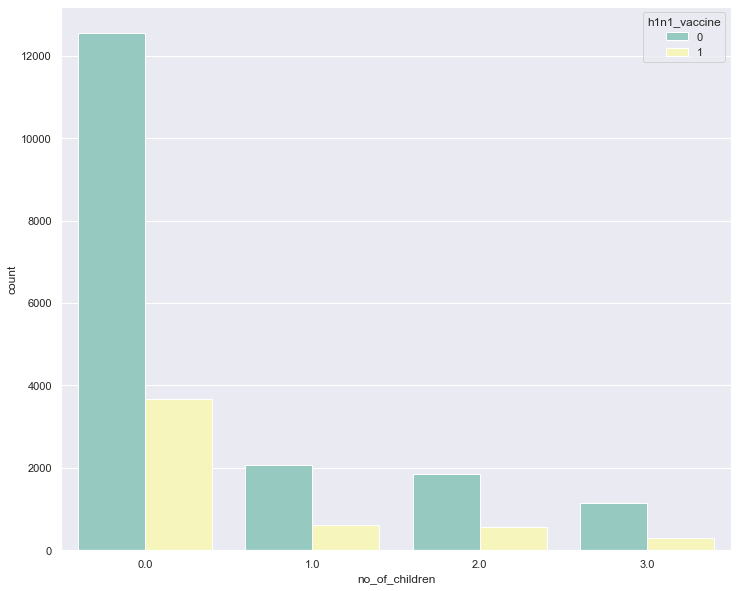

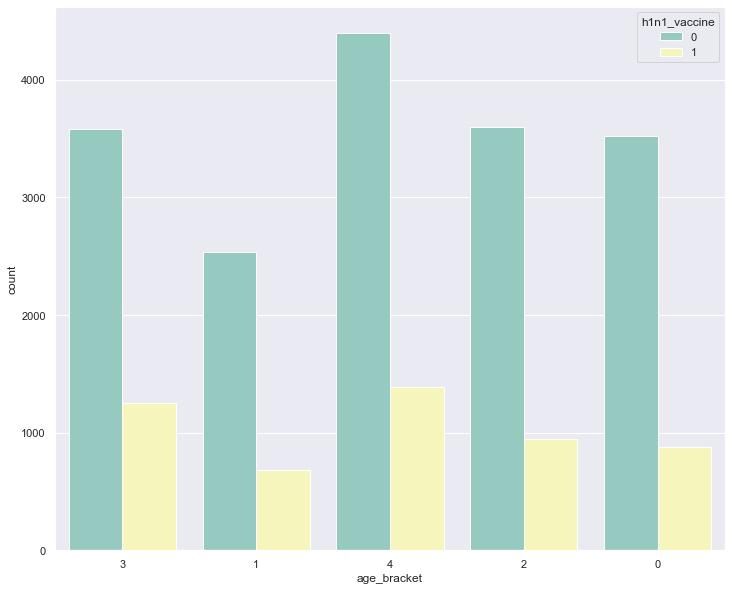

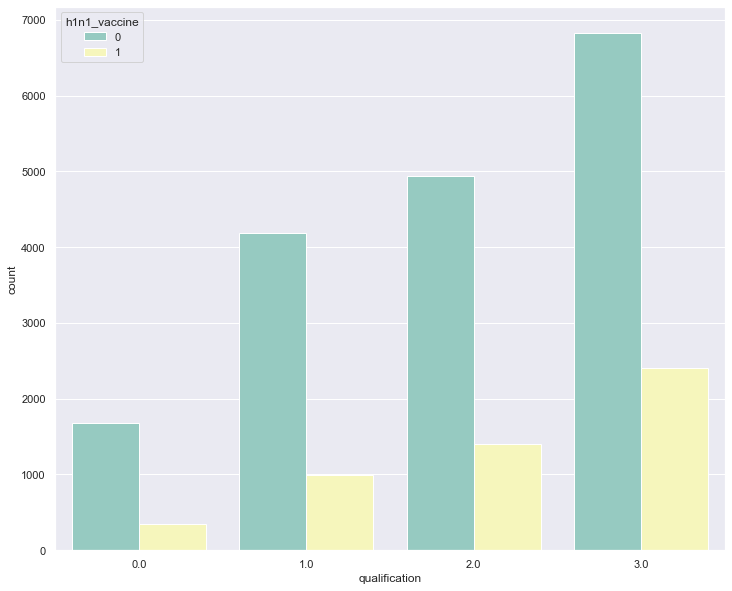

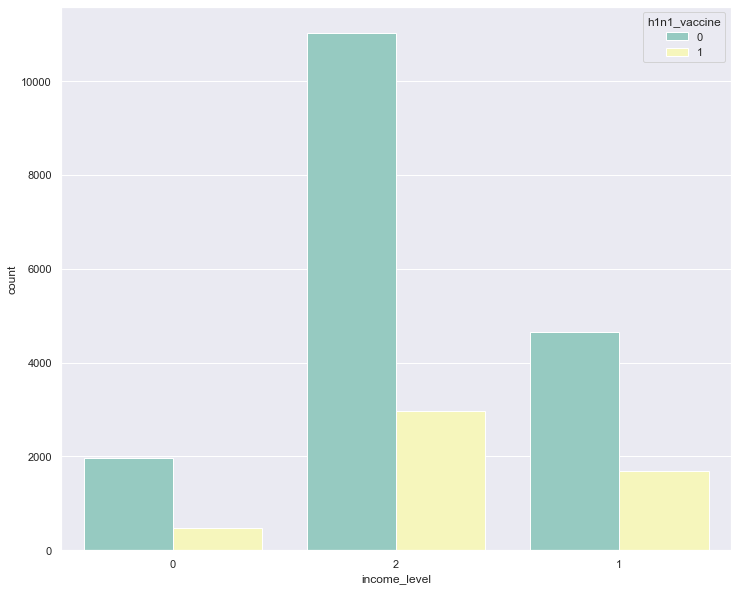

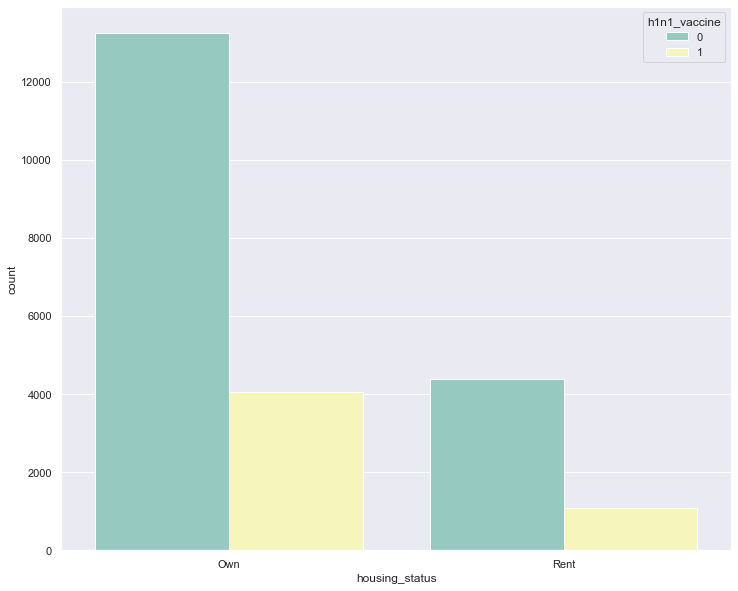

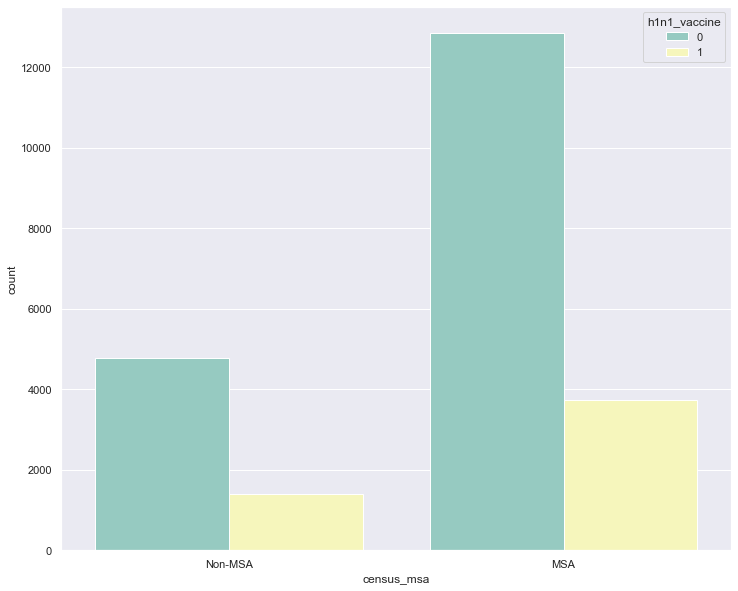

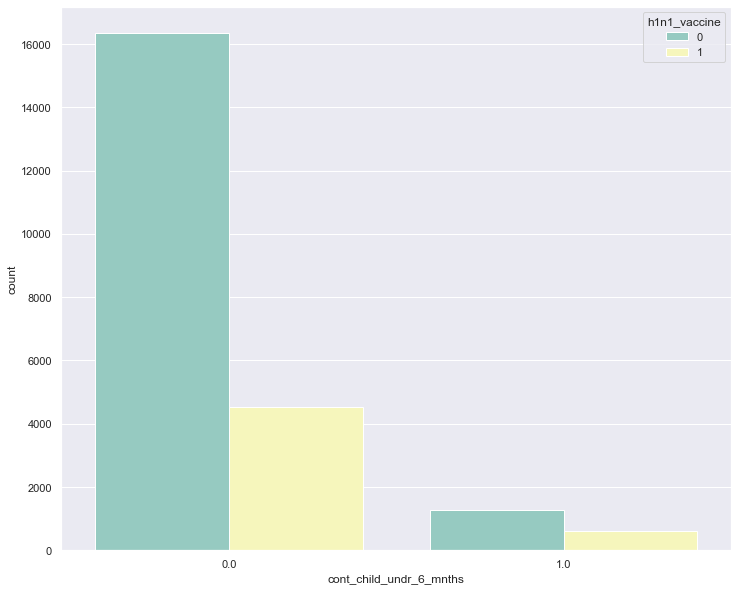

In [19]:
# Looping through all the features by our y variable - see if there is relationship

features = ['h1n1_worry', 'h1n1_awareness', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'is_seas_risky',
       'no_of_adults', 'no_of_children', 'age_bracket',
       'qualification', 'income_level', 'housing_status','census_msa','cont_child_undr_6_mnths',]

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3', hue = 'h1n1_vaccine')
    plt.show()

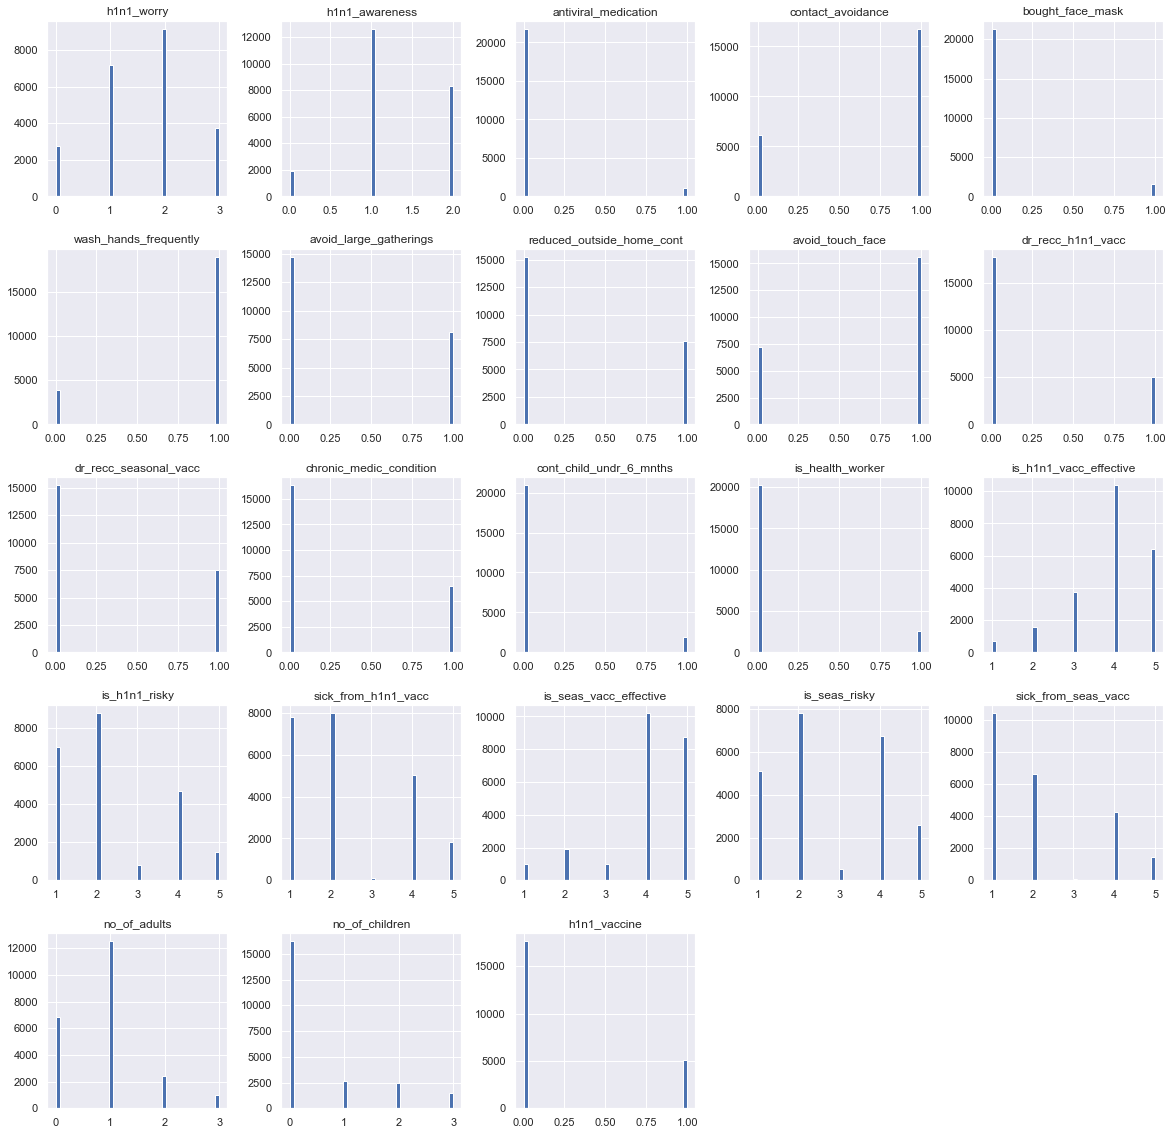

In [20]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist function 
plt.show()

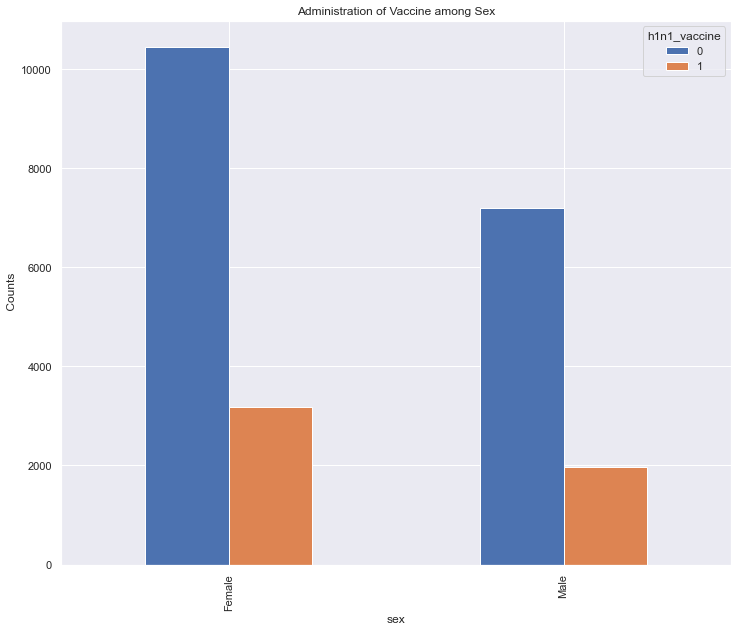

In [21]:
# plotting Sex Vs h1n1_vaccine (Double Bar chart)
#%matplotlib inline
pd.crosstab(df.sex ,df.h1n1_vaccine).plot(kind='bar')
plt.title('Administration of Vaccine among Sex')
plt.xlabel('sex')
plt.ylabel(' Counts')
plt.savefig('Sex Vs h1n1_vaccine')


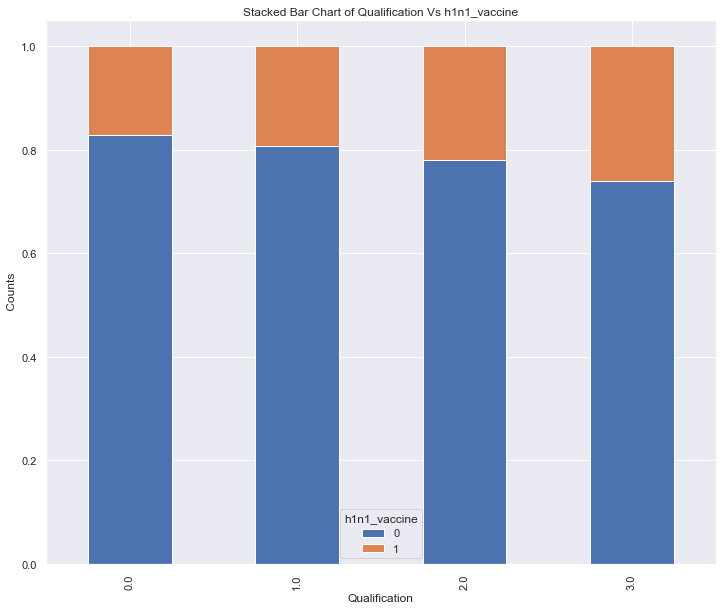

In [22]:
# plotting qualification Vs h1n1_vaccine (Stacked Bar Chart)
table=pd.crosstab(df.qualification,df.h1n1_vaccine)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Qualification Vs h1n1_vaccine')
plt.xlabel('Qualification')
plt.ylabel(' Counts')
plt.savefig('Qualification Vs h1n1_vaccine')

<AxesSubplot:xlabel='h1n1_worry'>

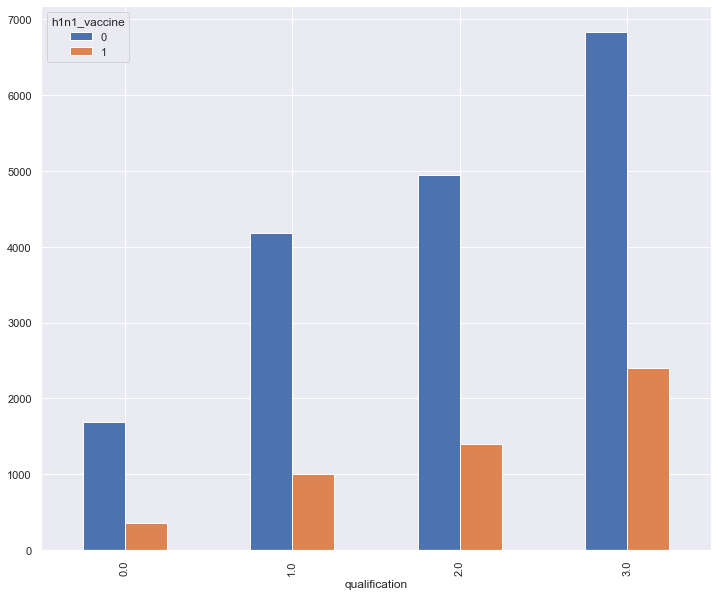

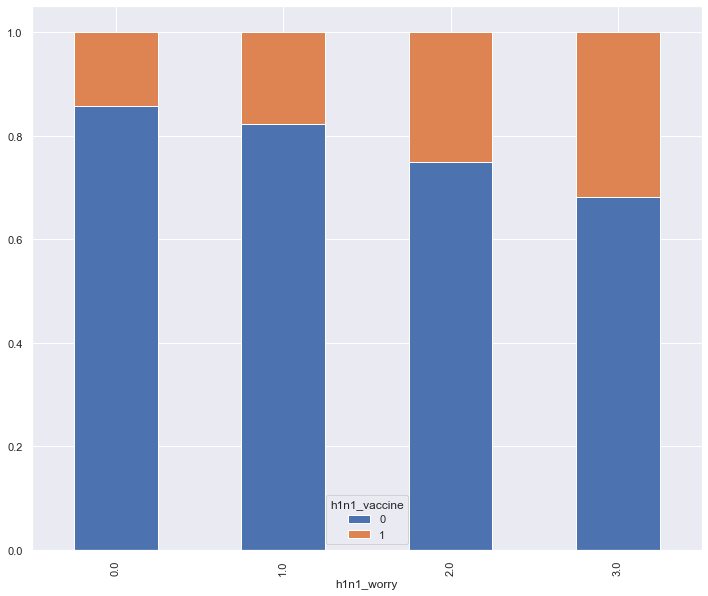

In [23]:
# OR Better (Double Bar chart)

#%matplotlib inline
pd.crosstab(df.qualification ,df.h1n1_vaccine).plot(kind='bar')


# plotting h1n1_worry Vs h1n1_vaccine (Stacked Bar Chart)
table=pd.crosstab(df.h1n1_worry,df.h1n1_vaccine)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)


In [24]:
# Exporting file
# Writing df data to df1_vaccine.csv
df.to_csv('df1_vaccine.csv', index=False)

df1 = pd.read_csv('df1_vaccine.csv')
df1.info()
df1.shape
print(list(df1.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22785 entries, 0 to 22784
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 22785 non-null  float64
 1   h1n1_awareness             22785 non-null  float64
 2   antiviral_medication       22785 non-null  float64
 3   contact_avoidance          22785 non-null  float64
 4   bought_face_mask           22785 non-null  float64
 5   wash_hands_frequently      22785 non-null  float64
 6   avoid_large_gatherings     22785 non-null  float64
 7   reduced_outside_home_cont  22785 non-null  float64
 8   avoid_touch_face           22785 non-null  float64
 9   dr_recc_h1n1_vacc          22785 non-null  float64
 10  dr_recc_seasonal_vacc      22785 non-null  float64
 11  chronic_medic_condition    22785 non-null  float64
 12  cont_child_undr_6_mnths    22785 non-null  float64
 13  is_health_worker           22785 non-null  flo

# Dummy variables of categorical columns

In [25]:
# Making categorical variables into numeric representation
# Create dummy variables
# That is variables with only two values, zero and one

cat_vars=['race','sex','marital_status','housing_status','census_msa']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    data1 = df1.join(cat_list)
    df1 = data1

cat_vars=['race','sex','marital_status','housing_status','employment','census_msa']
data_vars= df1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_dummy=df1[to_keep]
data_dummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22785 entries, 0 to 22784
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   h1n1_worry                  22785 non-null  float64
 1   h1n1_awareness              22785 non-null  float64
 2   antiviral_medication        22785 non-null  float64
 3   contact_avoidance           22785 non-null  float64
 4   bought_face_mask            22785 non-null  float64
 5   wash_hands_frequently       22785 non-null  float64
 6   avoid_large_gatherings      22785 non-null  float64
 7   reduced_outside_home_cont   22785 non-null  float64
 8   avoid_touch_face            22785 non-null  float64
 9   dr_recc_h1n1_vacc           22785 non-null  float64
 10  dr_recc_seasonal_vacc       22785 non-null  float64
 11  chronic_medic_condition     22785 non-null  float64
 12  cont_child_undr_6_mnths     22785 non-null  float64
 13  is_health_worker            227

In [26]:

# Exporting file
# Writing data_dummy data to df2_dummy_vaccine.csv
data_dummy.to_csv('df2_dummy_vaccine.csv', index=False)

# New Frame after Dummy vars adjusted


df2 = pd.read_csv('df2_dummy_vaccine.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22785 entries, 0 to 22784
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   h1n1_worry                  22785 non-null  float64
 1   h1n1_awareness              22785 non-null  float64
 2   antiviral_medication        22785 non-null  float64
 3   contact_avoidance           22785 non-null  float64
 4   bought_face_mask            22785 non-null  float64
 5   wash_hands_frequently       22785 non-null  float64
 6   avoid_large_gatherings      22785 non-null  float64
 7   reduced_outside_home_cont   22785 non-null  float64
 8   avoid_touch_face            22785 non-null  float64
 9   dr_recc_h1n1_vacc           22785 non-null  float64
 10  dr_recc_seasonal_vacc       22785 non-null  float64
 11  chronic_medic_condition     22785 non-null  float64
 12  cont_child_undr_6_mnths     22785 non-null  float64
 13  is_health_worker            227

# Input Split

In [27]:
# Feature Selection
# Split the data into X & y

X = df2.drop('h1n1_vaccine', axis = 1).values
y = df2['h1n1_vaccine']


print(X.shape)
print(y.shape)


(22785, 35)
(22785,)


In [28]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df2.drop('h1n1_vaccine', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for h1n1_worry is : 0.02716388173003989
The feature importance for h1n1_awareness is : 0.01635293740230852
The feature importance for antiviral_medication is : 0.0019533976595034236
The feature importance for contact_avoidance is : 0.00940189021149223
The feature importance for bought_face_mask is : 0.002023971717313736
The feature importance for wash_hands_frequently is : 0.006081857450071442
The feature importance for avoid_large_gatherings is : 0.008076372314160217
The feature importance for reduced_outside_home_cont is : 0.003785668449527491
The feature importance for avoid_touch_face is : 0.004846897271324377
The feature importance for dr_recc_h1n1_vacc is : 0.3282704812633892
The feature importance for dr_recc_seasonal_vacc is : 0.021939980863503884
The feature importance for chronic_medic_condition is : 0.010742479836344103
The feature importance for cont_child_undr_6_mnths is : 0.01126287828228504
The feature importance for is_health_worker is : 0.0462999

In [29]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,9,dr_recc_h1n1_vacc,0.328270
1,15,is_h1n1_risky,0.145992
2,14,is_h1n1_vacc_effective,0.125578
3,13,is_health_worker,0.046300
4,20,age_bracket,0.034074
5,18,is_seas_risky,0.028510
6,0,h1n1_worry,0.027164
7,19,sick_from_seas_vacc,0.023902
8,10,dr_recc_seasonal_vacc,0.021940
9,21,qualification,0.019545


In [30]:
#Splitting the Raw Data - Hold-out validation
# Print the shapes

print(df2.shape)
print(df2[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(22785, 36)
(22785, 35)


In [31]:
# Split the data into X & y

X = df2[columns_to_keep].values
X

y = df2['h1n1_vaccine']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(22785, 35)
(22785,)


In [32]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(16405, 35)
(4557, 35)
(1823, 35)
(16405,)
(4557,)
(1823,)


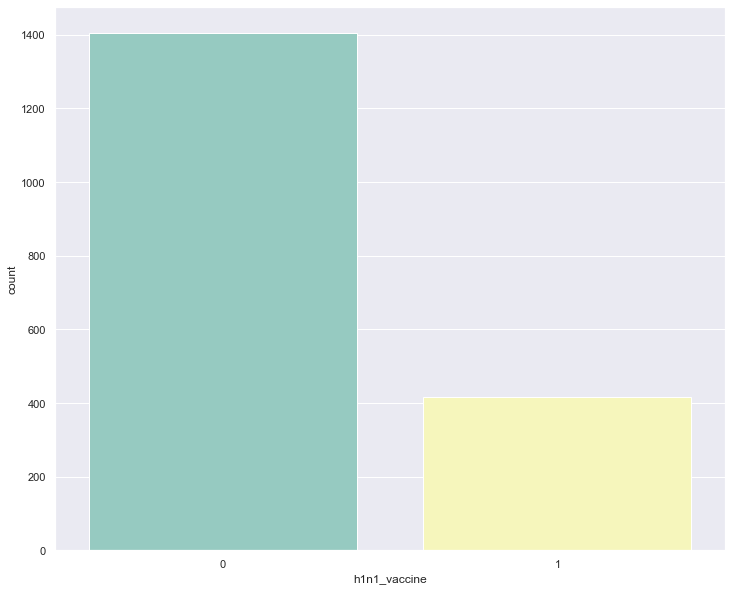

In [33]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid, palette = "Set3")

# Train model

In [34]:
### Running Logistic Regression

# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [35]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below


array([[1.998103, 0.389540, 0.645184, 0.826419, 0.134309, 0.165256,
        -0.091916, -0.078722, -0.571321, 0.094671, -0.024123, 0.002928,
        0.141186, -0.056306, 0.071981, -0.038468, 0.304593, 0.149468,
        -0.741201, -0.090184, -0.167115, 0.022919, -0.602830, -0.679884,
        -0.754688, 0.035805, -0.574187, -0.680051, -0.648991, -0.056424,
        -0.648824, -0.726045, 0.141614, 0.274886, -0.587674]])

In [36]:
#Evaluating the Model
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8321243523316062
The Testing Accuracy is:  0.8321263989466754
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12714
           1       0.69      0.46      0.55      3691

    accuracy                           0.83     16405
   macro avg       0.77      0.70      0.72     16405
weighted avg       0.82      0.83      0.82     16405



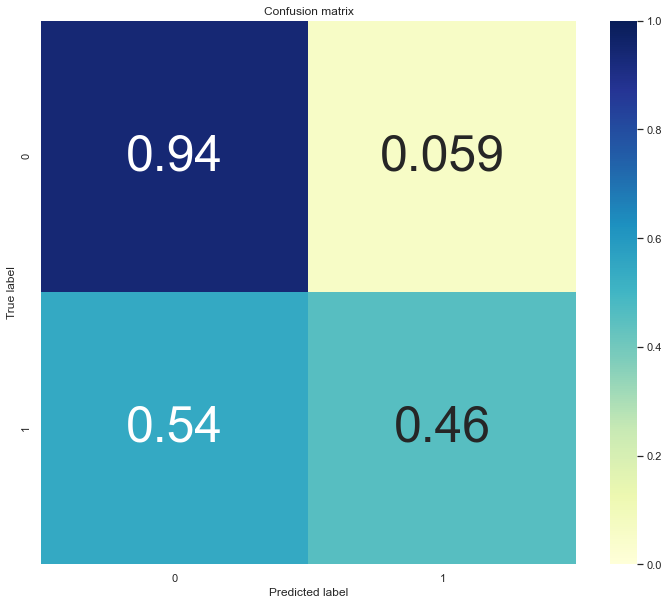

In [37]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')


In [38]:
log_reg.classes_

cm.sum(axis=1)
cm_norm

cm

cm.sum(axis=0)

np.diag(cm)

array([11966,  1685], dtype=int64)

In [39]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.941167 0.456516]
The Precision is: [0.856427 0.692561]
The False positive rate is: [0.543484 0.058833]
The False Negative Rate is:  [0.058833 0.543484]

The average TPR is: 0.6988415333020765
The average Precision is: 0.7744938823686949
The average False positive rate is: 0.3011584666979235
The average False Negative Rate is: 0.3011584666979235


In [40]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.3887445745261162
The Log Loss on Testing Dataset is:  0.3907868501180802


# Hyper Parameter Tuning
'''
We will loop over parameter C (Inverse of regularization strength).
Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5
'''

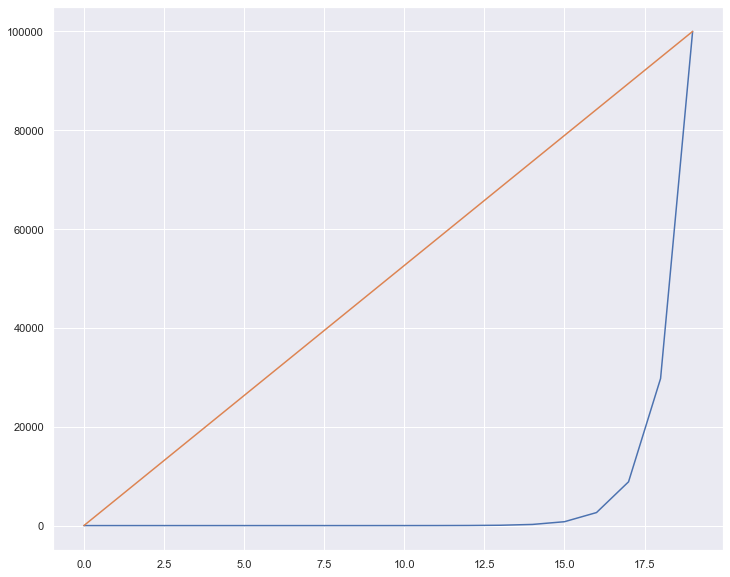

In [41]:
np.geomspace(1e-5, 1e5, num=20)

# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


In [42]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7728768926925609:
The Logg Loss of C parameter 1e-05 is 0.5224456875065677:

The CA of C parameter 3.359818286283781e-05 is 0.7728768926925609:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5014106722682898:

The CA of C parameter 0.00011288378916846884 is 0.7728768926925609:
The Logg Loss of C parameter 0.00011288378916846884 is 0.4700600219337184:

The CA of C parameter 0.000379269019073225 is 0.8029405310511302:
The Logg Loss of C parameter 0.000379269019073225 is 0.4407748167370235:

The CA of C parameter 0.0012742749857031334 is 0.8158876453807329:
The Logg Loss of C parameter 0.0012742749857031334 is 0.41787518512631144:

The CA of C parameter 0.004281332398719391 is 0.8272986614000439:
The Logg Loss of C parameter 0.004281332398719391 is 0.4019931028542969:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.01438449888287663 is 0.8305903006363836:
The Logg Loss of C parameter 0.01438449888287663 is 0.3940274501209403:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.04832930238571752 is 0.8330041694096993:
The Logg Loss of C parameter 0.04832930238571752 is 0.3914727131887347:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.1623776739188721 is 0.8336624972569673:
The Logg Loss of C parameter 0.1623776739188721 is 0.39087264764806373:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.5455594781168515 is 0.8327847267939433:
The Logg Loss of C parameter 0.5455594781168515 is 0.39084731617514995:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 1.8329807108324339 is 0.8325652841781874:
The Logg Loss of C parameter 1.8329807108324339 is 0.3908380244237488:



C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 6.1584821106602545 is 0.8330041694096993:
The Logg Loss of C parameter 6.1584821106602545 is 0.39068090752528906:

The CA of C parameter 20.6913808111479 is 0.8327847267939433:
The Logg Loss of C parameter 20.6913808111479 is 0.39067373566359:

The CA of C parameter 69.51927961775606 is 0.8330041694096993:
The Logg Loss of C parameter 69.51927961775606 is 0.3906707860329329:

The CA of C parameter 233.57214690901213 is 0.8327847267939433:
The Logg Loss of C parameter 233.57214690901213 is 0.39067017056118736:

The CA of C parameter 784.7599703514607 is 0.8330041694096993:
The Logg Loss of C parameter 784.7599703514607 is 0.39066950597748057:

The CA of C parameter 2636.6508987303555 is 0.8327847267939433:
The Logg Loss of C parameter 2636.6508987303555 is 0.39067026364374796:

The CA of C parameter 8858.667904100832 is 0.8330041694096993:
The Logg Loss of C parameter 8858.667904100832 is 0.390671370120663:

The CA of C parameter 29763.51441631313 is 0.833004169409

In [43]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,15,784.759970,0.833004,0.390670
1,14,233.572147,0.832785,0.390670
2,16,2636.650899,0.832785,0.390670
3,19,100000.000000,0.833004,0.390671
4,13,69.519280,0.833004,0.390671
5,18,29763.514416,0.833004,0.390671
6,17,8858.667904,0.833004,0.390671
7,12,20.691381,0.832785,0.390674
8,11,6.158482,0.833004,0.390681
9,10,1.832981,0.832565,0.390838


In [44]:
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)


The CA is: 0.8327847267939433
The Logistic Loss is:  0.3906680656915589
The optimal C parameter is:  [784.759970]


The CA of C parameter 1e-05 is 0.7728768926925609:
The Logg Loss of C parameter 1e-05 is 0.5224456875065677:



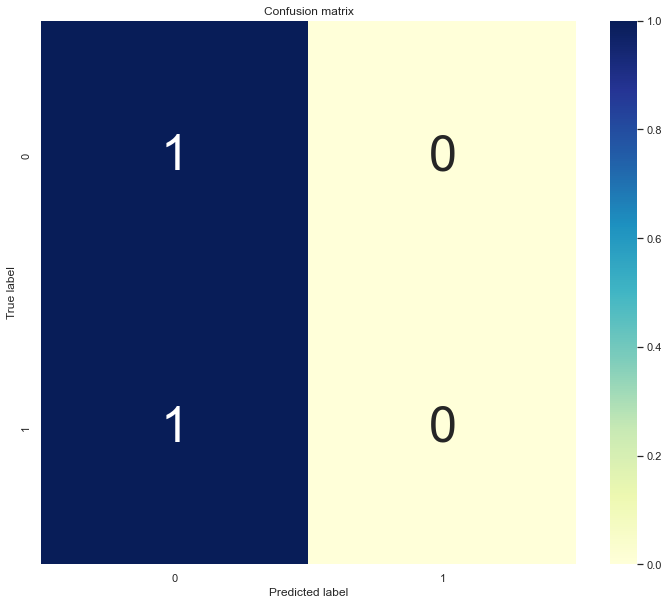

The CA of C parameter 3.359818286283781e-05 is 0.7728768926925609:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5014106722682898:



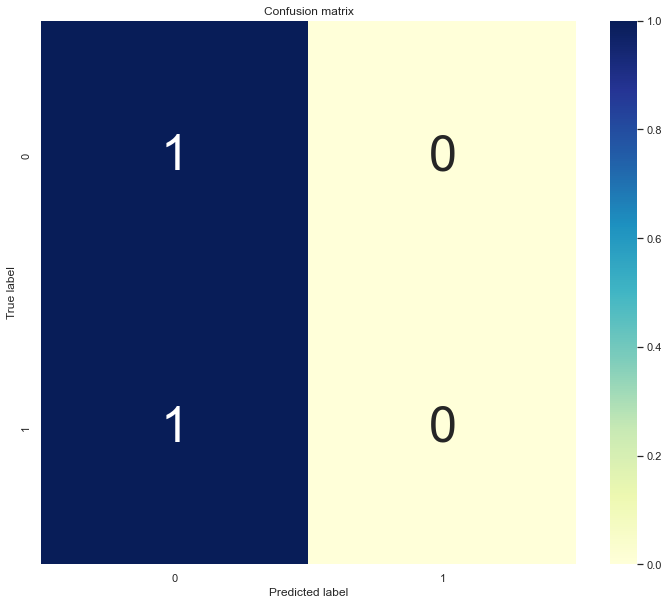

The CA of C parameter 0.00011288378916846884 is 0.7728768926925609:
The Logg Loss of C parameter 0.00011288378916846884 is 0.4700600219337184:



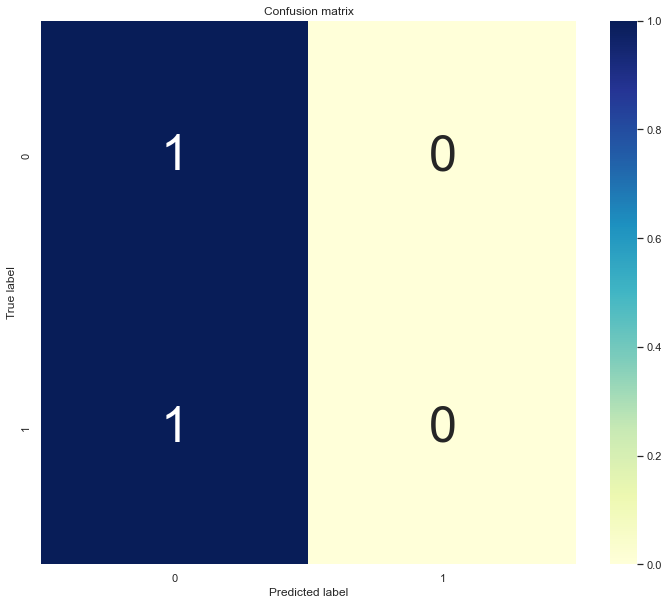

The CA of C parameter 0.000379269019073225 is 0.8029405310511302:
The Logg Loss of C parameter 0.000379269019073225 is 0.4407748167370235:



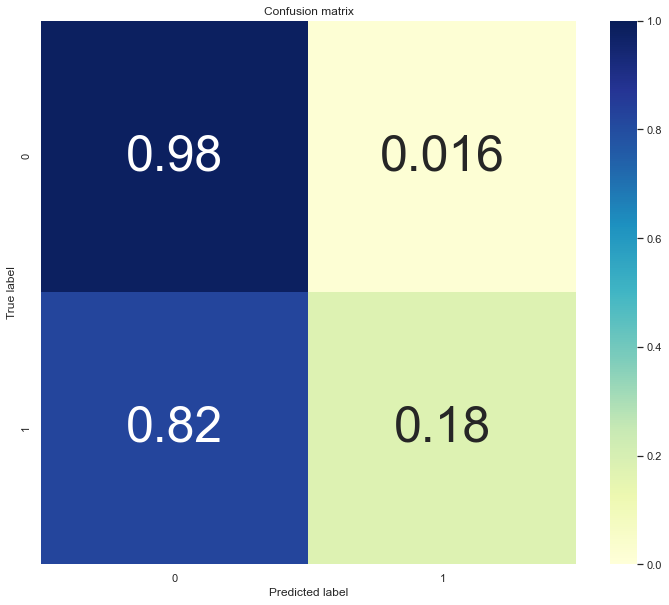

The CA of C parameter 0.0012742749857031334 is 0.8158876453807329:
The Logg Loss of C parameter 0.0012742749857031334 is 0.41787518512631144:



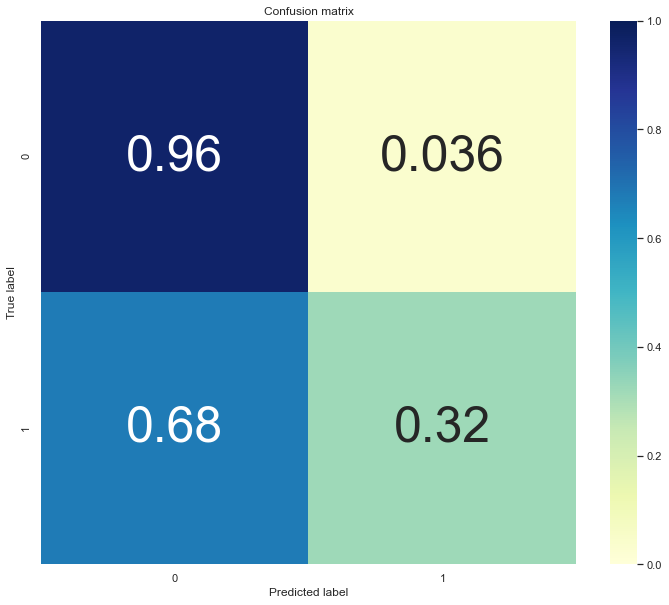

The CA of C parameter 0.004281332398719391 is 0.8272986614000439:
The Logg Loss of C parameter 0.004281332398719391 is 0.4019931028542969:



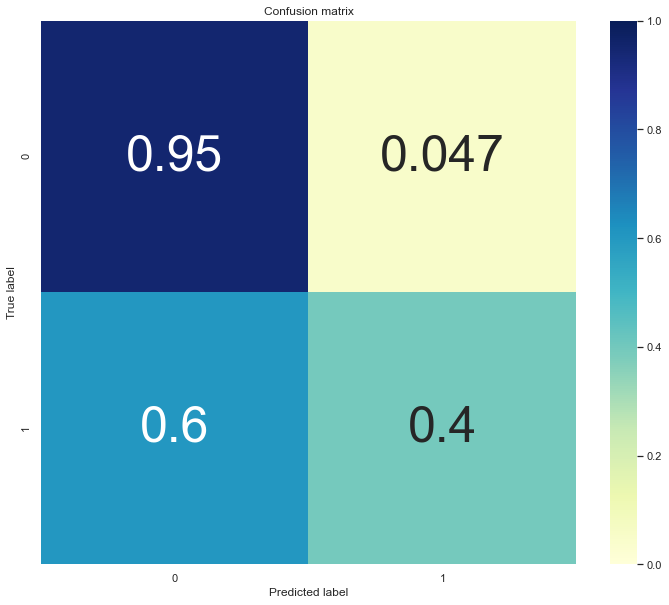

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.01438449888287663 is 0.8305903006363836:
The Logg Loss of C parameter 0.01438449888287663 is 0.3940274501209403:



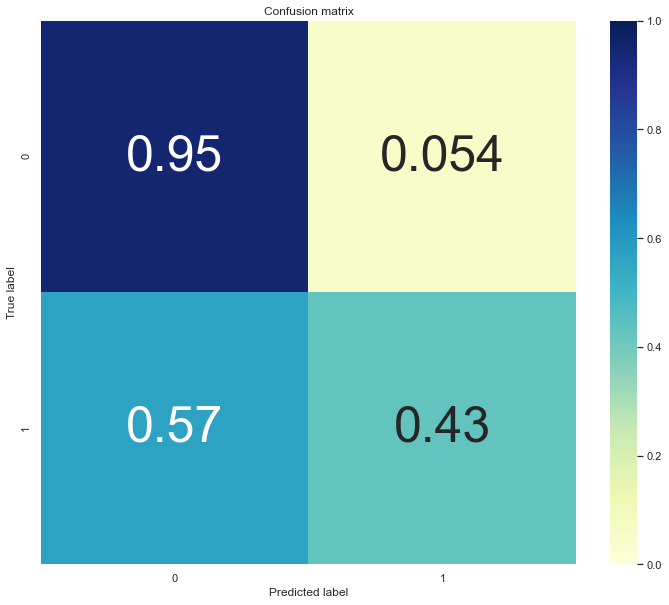

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.04832930238571752 is 0.8330041694096993:
The Logg Loss of C parameter 0.04832930238571752 is 0.3914727131887347:



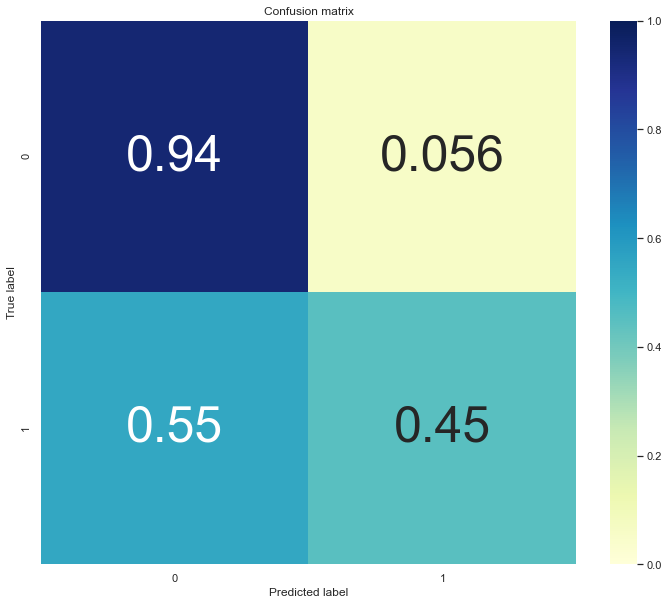

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.1623776739188721 is 0.8336624972569673:
The Logg Loss of C parameter 0.1623776739188721 is 0.39087264764806373:



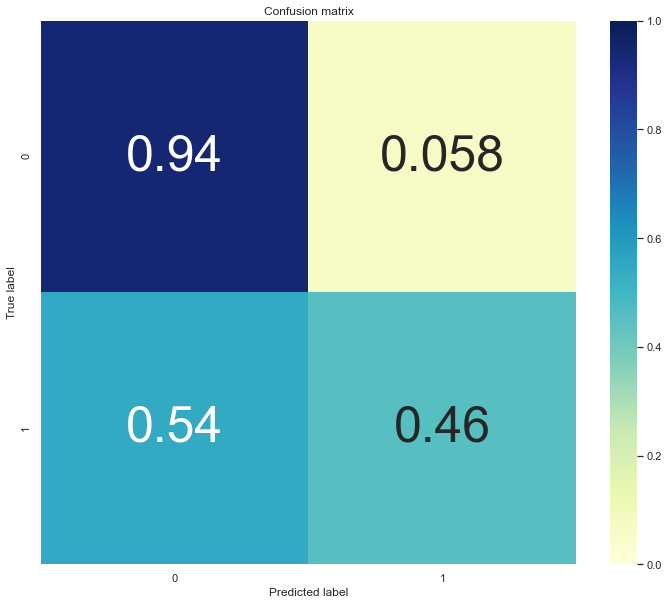

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.5455594781168515 is 0.8327847267939433:
The Logg Loss of C parameter 0.5455594781168515 is 0.39084731617514995:



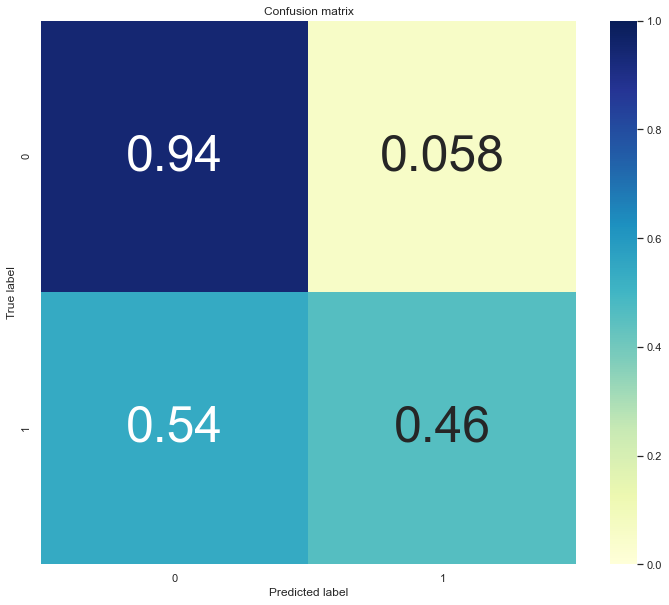

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 1.8329807108324339 is 0.8325652841781874:
The Logg Loss of C parameter 1.8329807108324339 is 0.3908380244237488:



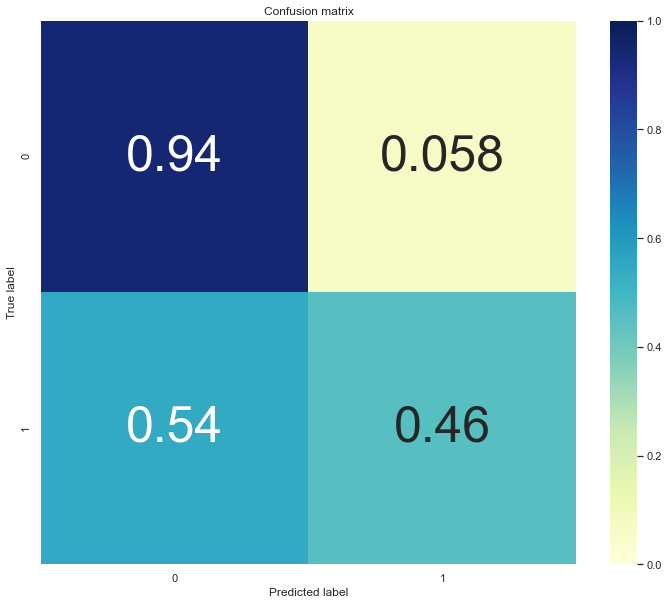

C:\Users\LC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 6.1584821106602545 is 0.8330041694096993:
The Logg Loss of C parameter 6.1584821106602545 is 0.39068090752528906:



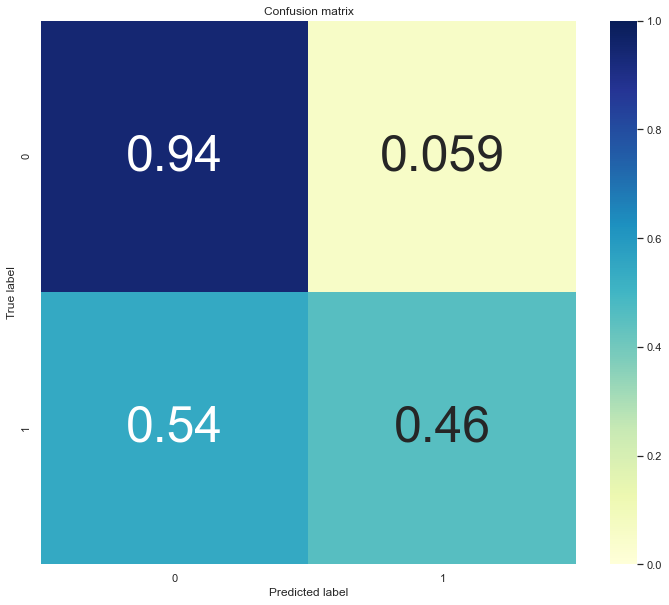

The CA of C parameter 20.6913808111479 is 0.8327847267939433:
The Logg Loss of C parameter 20.6913808111479 is 0.39067373566359:



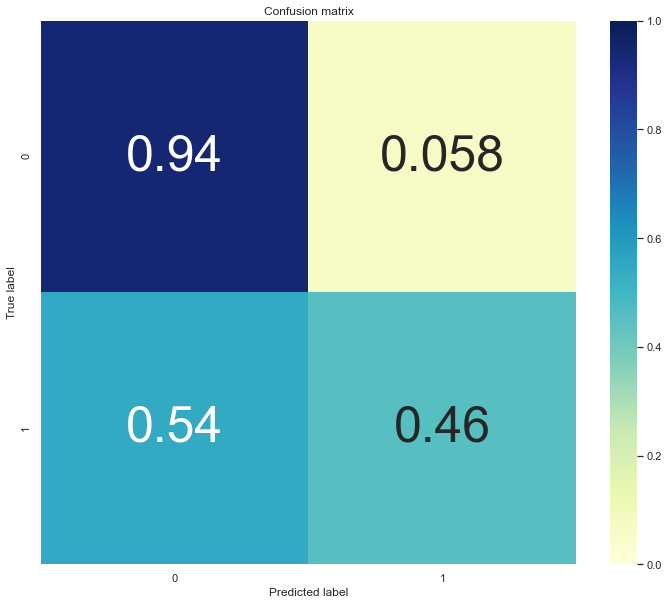

The CA of C parameter 69.51927961775606 is 0.8330041694096993:
The Logg Loss of C parameter 69.51927961775606 is 0.3906707860329329:



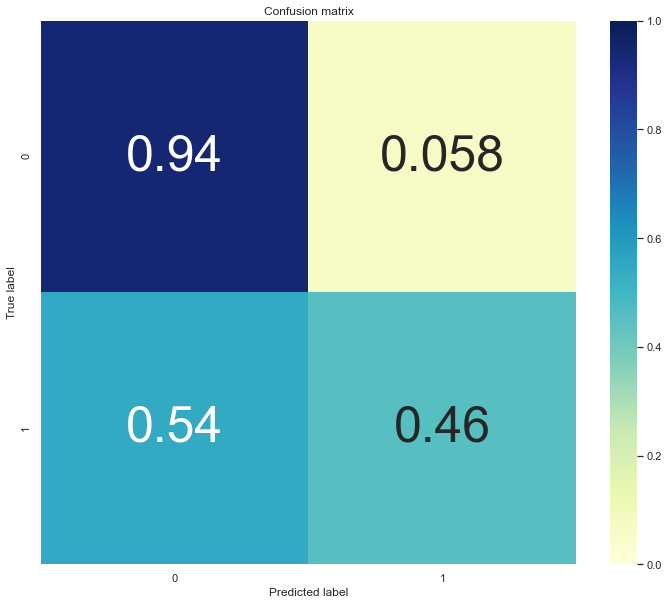

The CA of C parameter 233.57214690901213 is 0.8327847267939433:
The Logg Loss of C parameter 233.57214690901213 is 0.39067017056118736:



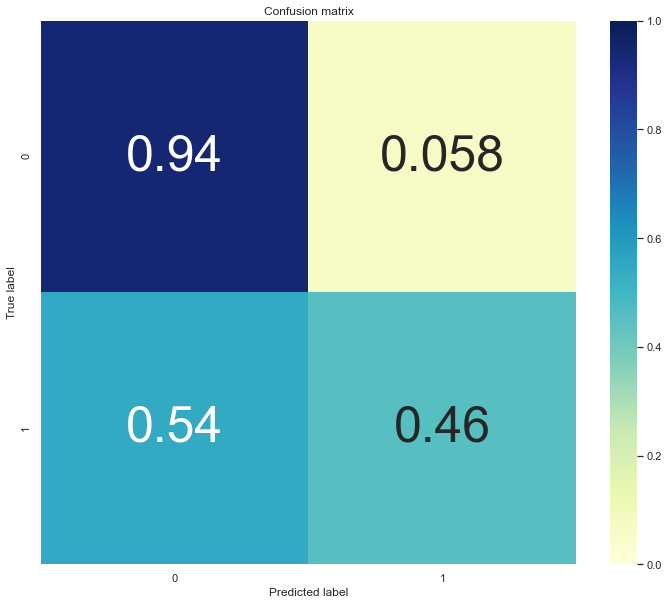

The CA of C parameter 784.7599703514607 is 0.8330041694096993:
The Logg Loss of C parameter 784.7599703514607 is 0.39066950597748057:



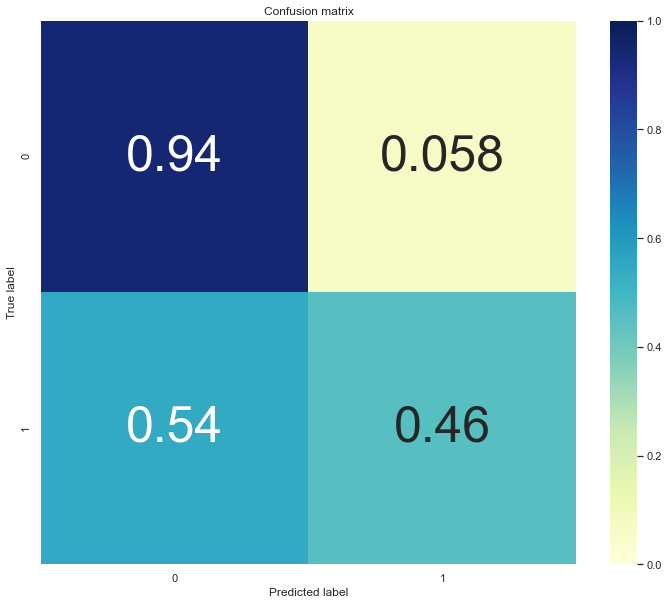

The CA of C parameter 2636.6508987303555 is 0.8327847267939433:
The Logg Loss of C parameter 2636.6508987303555 is 0.39067026364374796:



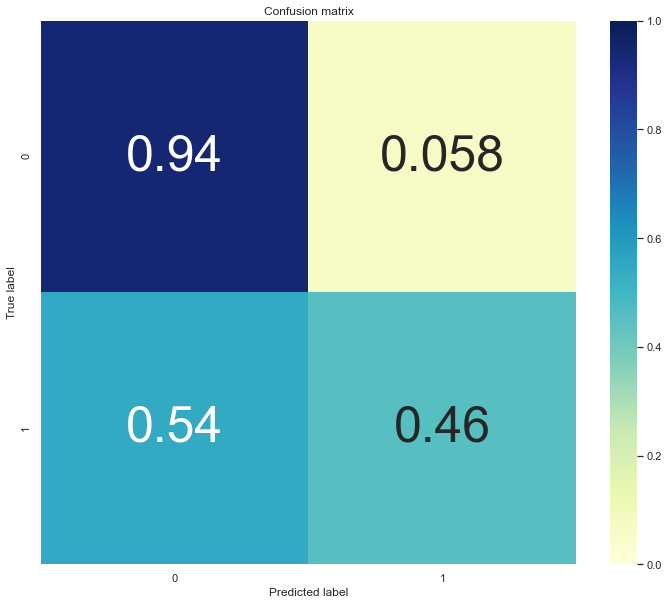

The CA of C parameter 8858.667904100832 is 0.8330041694096993:
The Logg Loss of C parameter 8858.667904100832 is 0.390671370120663:



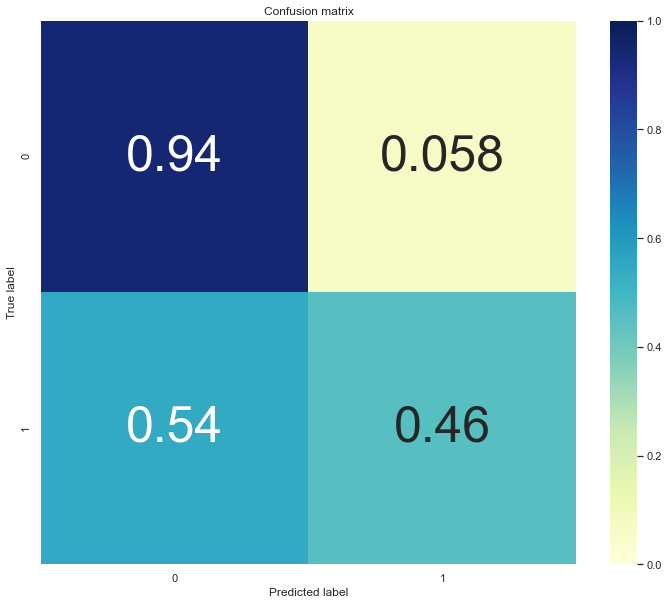

The CA of C parameter 29763.51441631313 is 0.8330041694096993:
The Logg Loss of C parameter 29763.51441631313 is 0.39067088049732823:



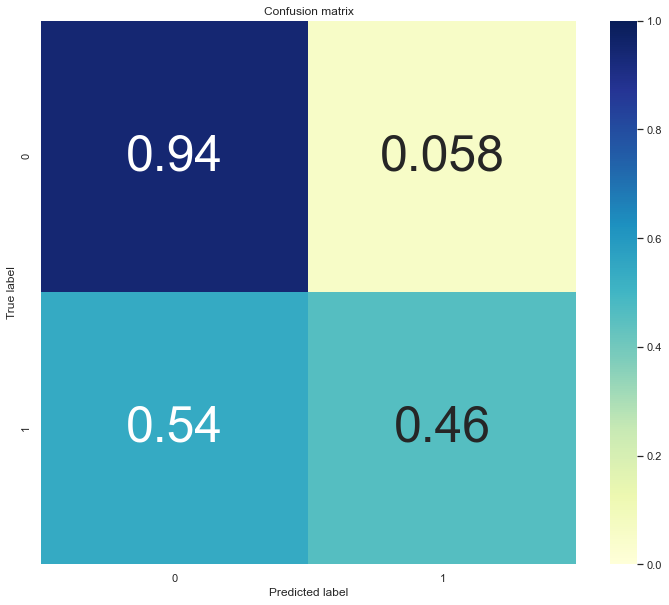

The CA of C parameter 100000.0 is 0.8330041694096993:
The Logg Loss of C parameter 100000.0 is 0.3906706142749129:



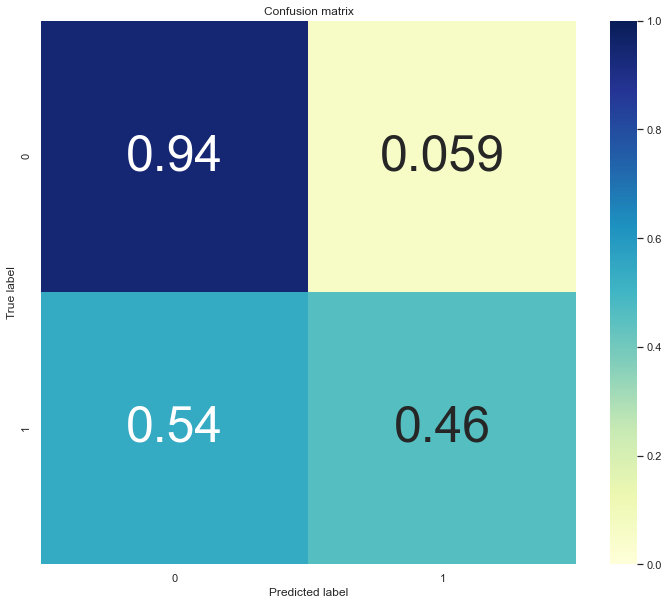

In [45]:
'''
K-fold cross validation:
Advantage: K-fold cross validation uses all the training data to 
train the model, by applying k different splits; repeated train-test
 splits converge to the true accuracy given that the training data is 
 representable for the underlying distribution; however in practise this 
 is often overoptimistic. Disadvantage: The disadvantage of this method is
 that the training algorithm has to be rerun from the beginning k times, 
 which means it takes k times as much computation to get an evaluation. 
 Additionally, if you want to test the performance on a completely new 
 dataset that the algorithm has never seen, you cannot do this with k-fold
 cross validation.

Hold-out:
Advantage: The advantage of Hold-out is that you can test how your
 model performs on completely unseen data that you haven't used when 
 training the model. Additionally, Hold-out is usually much faster and
 less computationally expensive. Disadvantage: The evaluation may depend
 heavily on which data points end up in the training set and which end up
 in the test set, and thus the evaluation may be significantly different
 depending on how the division is made.
'''


# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()

In [46]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7728768926925609
Log Loss: 7.844554217408945


In [47]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


Testing Acc: 0.8228195282501372
Log Loss: 0.4153567179198013
